# Visualization of fitting test sample data

sdfsdf

In [1]:
import tensorflow as tf
from scipy.io import wavfile
import os
import numpy as np
from glob import glob
from datagenerator import id2name, DataGenerator, load_filenames, POSSIBLE_LABELS, SOUND_LENGTH, name2id
from manual_train import DATADIR
from visualization import plot_sound
import IPython.display as ipd
import plotly.offline as py
py.init_notebook_mode(connected=True)
%load_ext autoreload
%autoreload 2
%matplotlib inline

Load model and some tensors

In [2]:
# set model_dir
model_dir = './model-resnet'
# get latest checkpoint
model_meta_path = tf.train.latest_checkpoint(model_dir) + '.meta'
saver = tf.train.import_meta_graph(model_meta_path)
graph = tf.get_default_graph()
prediction = graph.get_tensor_by_name('prediction:0')
wav = graph.get_tensor_by_name('wav:0')
x = graph.get_tensor_by_name('spectrogram:0')
labels = graph.get_tensor_by_name('labels:0')
iter_mode = graph.get_tensor_by_name('iter_mode:0')
path = '/home/red-haired/programming/kaggle_speech/data/train/audio/no/0d2bcf9d_nohash_0.wav'
sample_rate = 16000

Create session and load model

In [3]:
sess = tf.Session()
chekpoint_filepath = tf.train.latest_checkpoint(model_dir)
saver.restore(sess, chekpoint_filepath)

INFO:tensorflow:Restoring parameters from ./model-resnet/model-42000


Create data generator for test sample data

In [10]:
test_sample = glob(os.path.join(DATADIR, 'test_sample/*/*wav'))
trainfiles, valfiles = load_filenames(DATADIR)
train_gen = DataGenerator(trainfiles)
#train_iterator = train_gen.get_tf_iterator(batch_size=1)
#train_mode = sess.run(train_iterator.string_handle())
train_generator = train_gen.get_generator(include_label=True, include_filename=True)()
sample_generator = DataGenerator(test_sample)
sample_iterator = sample_generator.get_tf_iterator(batch_size=1)
sample_mode = sess.run(sample_iterator.string_handle())
print(type(sample_mode))

There are 57928 train and 6798 val samples


/home/red-haired/programming/kaggle_speech/venv/lib/python3.5/site-packages/scipy/io/wavfile.py:273: WavFileWarning:

Chunk (non-data) not understood, skipping it.



<class 'bytes'>


Run session to get data sample and feed it to model

In [11]:
sess.run(sample_iterator.initializer)
#sess.run(train_iterator.initializer)
variable_names = [v.name for v in tf.trainable_variables()]
print(variable_names)

['InceptionResnetV2/Conv2d_1a_3x3/weights:0', 'InceptionResnetV2/Conv2d_1a_3x3/BatchNorm/beta:0', 'InceptionResnetV2/Conv2d_2a_3x3/weights:0', 'InceptionResnetV2/Conv2d_2a_3x3/BatchNorm/beta:0', 'InceptionResnetV2/Conv2d_2b_3x3/weights:0', 'InceptionResnetV2/Conv2d_2b_3x3/BatchNorm/beta:0', 'InceptionResnetV2/Conv2d_3b_1x1/weights:0', 'InceptionResnetV2/Conv2d_3b_1x1/BatchNorm/beta:0', 'InceptionResnetV2/Conv2d_4a_3x3/weights:0', 'InceptionResnetV2/Conv2d_4a_3x3/BatchNorm/beta:0', 'InceptionResnetV2/Mixed_5b/Branch_0/Conv2d_1x1/weights:0', 'InceptionResnetV2/Mixed_5b/Branch_0/Conv2d_1x1/BatchNorm/beta:0', 'InceptionResnetV2/Mixed_5b/Branch_1/Conv2d_0a_1x1/weights:0', 'InceptionResnetV2/Mixed_5b/Branch_1/Conv2d_0a_1x1/BatchNorm/beta:0', 'InceptionResnetV2/Mixed_5b/Branch_1/Conv2d_0b_5x5/weights:0', 'InceptionResnetV2/Mixed_5b/Branch_1/Conv2d_0b_5x5/BatchNorm/beta:0', 'InceptionResnetV2/Mixed_5b/Branch_2/Conv2d_0a_1x1/weights:0', 'InceptionResnetV2/Mixed_5b/Branch_2/Conv2d_0a_1x1/BatchNo

Real label:  unknown
Predicted label:  unknown
filename: ./data/train/audio/dog/1a6eca98_nohash_0.wav


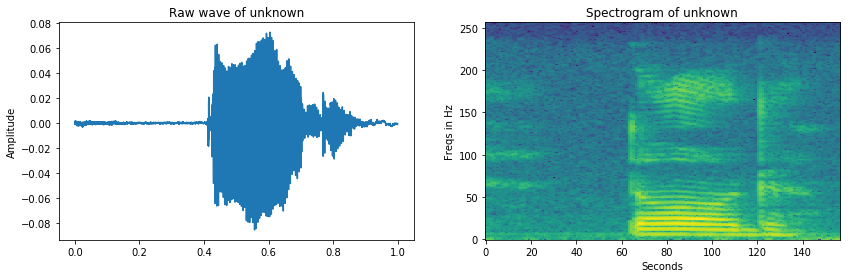

In [987]:
for label_real, fname, wav_val in train_generator:
    wav_val, x_val, label_val, prediction_val = sess.run((wav, x, labels, prediction), feed_dict={wav:[wav_val], labels:[label_real]})
    wav_val = wav_val[0]
    x_val = x_val[0]
    print(label_val[0])
    print(prediction_val[0])
    label_val = id2name[label_val[0]]
    prediction_val = id2name[prediction_val[0]]
    if label_val != prediction_val:
        break
plot_sound(label_val, wav_val, x_val)
print('Real label: ', label_val)
print('Predicted label: ', prediction_val)
print('filename:', fname)

ipd.Audio(wav_val, rate=sample_rate)

In [972]:
fields = fname.split('/')
fields[-2] = '_background_noise_'
newfname = os.path.join(*fields)
print(newfname)
os.rename(fname, newfname)

./data/train/audio/_background_noise_/b959cd0c_nohash_0.wav
